In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
season = pd.read_csv('shift_season.csv')
s_10 = pd.read_csv('shift_10.csv')

In [8]:
season[(season.SEASON_ID == 22019) & (season.TEAM_ABBREVIATION == 'DAL')][['PTS', 'FG_PCT','FG3_PCT']].tail()

,PTS,FG_PCT,FG3_PCT
29147,116.771429,0.460714,0.365343
29148,116.690141,0.460535,0.365183
29149,116.958333,0.459931,0.364569
29150,117.027397,0.461370,0.366425
29151,117.216216,0.462149,0.367622


In [9]:
season.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'TEAM_ID_OPP',
       'TEAM_ABBREVIATION_OPP', 'TEAM_NAME_OPP', 'MATCHUP_OPP', 'WL_OPP',
       'MIN_OPP', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP', 'FG_PCT_OPP', 'FG3M_OPP',
       'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP', 'FTA_OPP', 'FT_PCT_OPP',
       'OREB_OPP', 'DREB_OPP', 'REB_OPP', 'AST_OPP', 'STL_OPP', 'BLK_OPP',
       'TOV_OPP', 'PF_OPP', 'PLUS_MINUS_OPP', 'TEAM_TEST', 'TEST_OPP', 'ML_A',
       'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE',
       'GP', 'GAME_TOTAL'],
      dtype='object')

In [90]:
cols = ['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'ML_A', 'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE', 'GP', 'GAME_TOTAL']

d_cols = ['WL_OPP', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP', 'FG_PCT_OPP', 'FG3M_OPP', 'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP', 'FTA_OPP', 'FT_PCT_OPP', 'REB_OPP', 'AST_OPP', 'STL_OPP', 'BLK_OPP', 'TOV_OPP', 'PF_OPP', 'ML_A', 'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE', 'GP', 'GAME_TOTAL']

Text(0.5, 1.0, 'OFFENSIVE STATS')

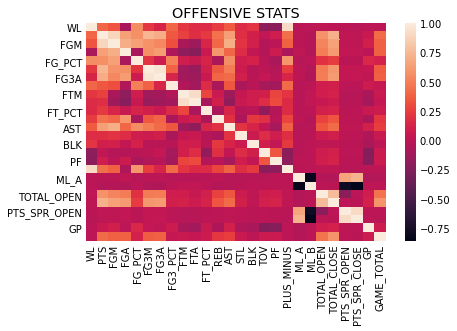

In [95]:
fig1,ax1 = plt.subplots()
sns.heatmap(season[cols].corr(), ax = ax1)
ax1.set_title('OFFENSIVE STATS')

Text(0.5, 1.0, 'DEFENSIVE STATS')

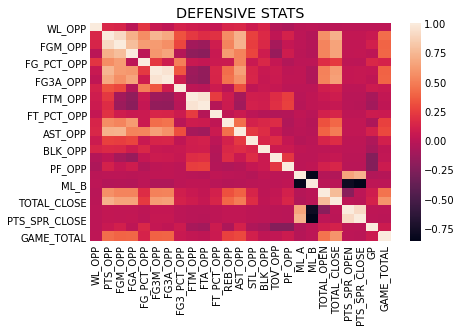

In [96]:
fig2,ax2 = plt.subplots()
sns.heatmap(season[d_cols].corr(), ax=ax2)
ax2.set_title('DEFENSIVE STATS')

In [ ]:
#sns.pairplot(season[cols])

In [83]:
pts_avg = season.groupby('SEASON_ID')['GAME_TOTAL'].mean().values
total_avg = season.groupby('SEASON_ID')['TOTAL_CLOSE'].mean().values
pts_max= season.groupby('SEASON_ID')['GAME_TOTAL'].max().values
pts_min= season.groupby('SEASON_ID')['GAME_TOTAL'].min().values
seasons = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019]
seasons_less = [2007, 2008, 2009, 2011, 2012, 2013, 2015,
       2016, 2017, 2018, 2019]
seasons_more = [2010, 2014]

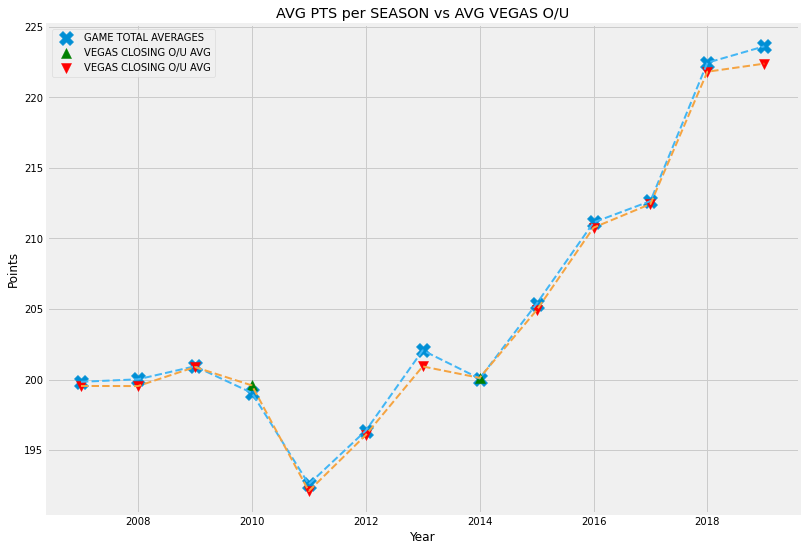

In [89]:
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(seasons,pts_avg, label='GAME TOTAL AVERAGES', marker='X', s=200)
ax.scatter(seasons_more,total_avg[total_avg > pts_avg], label = 'VEGAS CLOSING O/U AVG', marker= '^', s = 100, c = 'g')
ax.scatter(seasons_less,total_avg[total_avg < pts_avg], label = 'VEGAS CLOSING O/U AVG', marker= 'v', s=100, c = 'r')
# ax.scatter(seasons, pts_max, marker= '_', c='#f5d442')
# ax.scatter(seasons, pts_min, marker= '_', c='#f5d442')
ax.plot(seasons, pts_avg, ls = '--', lw = 2, c= '#42b6f5')
ax.plot(seasons, total_avg, ls = '--', lw = 2, c= '#f5a442')
ax.set_xlabel('Year')
ax.set_ylabel('Points')
ax.set_title('AVG PTS per SEASON vs AVG VEGAS O/U')
ax.legend()

In [46]:
['v' if x< pts_avg[idx] else '^' for idx, x in enumerate(total_avg)]

['v', 'v', 'v', '^', 'v', 'v', 'v', '^', 'v', 'v', 'v', 'v', 'v']

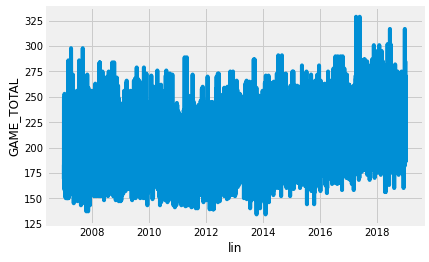

In [82]:
sns.lineplot('lin', 'GAME_TOTAL', data=season)

In [75]:
season['lin']= np.linspace(2007,2019, len(season))

In [76]:
season['lin']

0        2007.00000
1        2007.00039
2        2007.00078
3        2007.00117
4        2007.00156
            ...    
30761    2018.99844
30762    2018.99883
30763    2018.99922
30764    2018.99961
30765    2019.00000
Name: lin, Length: 30766, dtype: float64

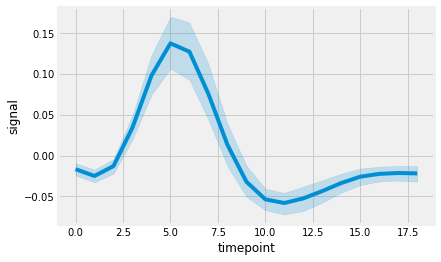

In [79]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [80]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
